<a href="https://colab.research.google.com/github/sjinang/EE604A_ImageProcessing/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Image resizing (Upsampling / Downsampling)

Note that in digital image processing upsampling or downsampling simply means resizing your image. When you upsample you zoom the image and vice-versa. We will use two different spatial domain approach (interpolation method) to achieve this:
1. Nearest Neighbour interpolation/ Pixel replication method [Wiki](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation)
2. Bilinear interpolation method [Wiki](https://en.wikipedia.org/wiki/Bilinear_interpolation)

In this assignment we will will not analyse the frequency domain signal.

In [ ]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-gopb0mab
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=b20490bb26baf5320b47bd62b53da91b86c6b699eea8221a84c4801f68917ec6
  Stored in directory: /tmp/pip-ephem-wheel-cache-58cshf6l/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-gopb0mab


In [ ]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=1, task_no=2) # download data for this assignment

Download Complete!


In [ ]:
data = cv2.imread("data/parallel_lines.jpg")

In [ ]:
def resize_nn(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    out_img = np.zeros((int(img.shape[0]*k),int(img.shape[1]*k),img.shape[2]),dtype=np.uint8)
    
    for i in range(out_img.shape[0]):
      for j in range(out_img.shape[1]):
        for z in range(out_img.shape[2]):
          x=int(np.floor(i/k))
          y=int(np.floor(j/k))
          
          out_img[i,j,z] = img[x,y,z]
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [ ]:
def resize_bilinear(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    out_img = np.zeros((int(img.shape[0]*k),int(img.shape[1]*k),img.shape[2]),dtype=np.uint8)

    for i in range(out_img.shape[0]):
      for j in range(out_img.shape[1]):
        for z in range(out_img.shape[2]):
          
          x = [int(np.floor(i/k)),i/k,int(np.ceil(i/k))]
          y = [int(np.floor(j/k)),j/k,int(np.ceil(j/k))]

          if x[2]>img.shape[0]-1: x[2]=x[0]
          if y[2]>img.shape[1]-1: y[2]=y[0]
          
          # adding conditions in place of using padding
          if x[0]==x[2] and y[0]==y[2]: out_img[i,j,z] = img[x[0],y[0],z]
          elif x[0]==x[2]: out_img[i,j,z] = (((y[2]-y[1])/(y[2]-y[0]))*img[x[0],y[0],z]) + (((y[1]-y[0])/(y[2]-y[0]))*img[x[0],y[2],z])
          elif y[0]==y[2]: out_img[i,j,z] = (((x[2]-x[1])/(x[2]-x[0]))*img[x[0],y[0],z]) + (((x[1]-x[0])/(x[2]-x[0]))*img[x[2],y[0],z])
          else:
            tmp1 = (((y[2]-y[1])/(y[2]-y[0]))*img[x[0],y[0],z]) + (((y[1]-y[0])/(y[2]-y[0]))*img[x[0],y[2],z])
            tmp2 = (((y[2]-y[1])/(y[2]-y[0]))*img[x[2],y[0],z]) + (((y[1]-y[0])/(y[2]-y[0]))*img[x[2],y[2],z])

            out_img[i,j,z] = (((x[2]-x[1])/(x[2]-x[0]))*tmp1) + (((x[1]-x[0])/(x[2]-x[0]))*tmp2)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

#### Sample the given image for following values of k = 0.5, 0.51, 0.99, 2, 2.1 using both the methods. 

Plot the images using `cv2_imshow` and write your observation on the differences with an intuitive explanation.


K = 0.5 ; Nearest Neighbour


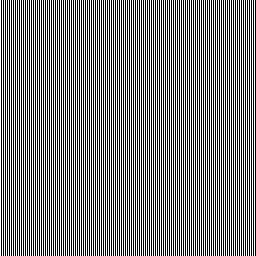


K = 0.5 ; Bilinear


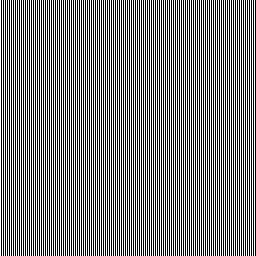


K = 0.51 ; Nearest Neighbour


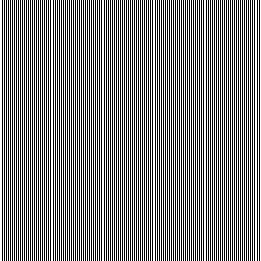


K = 0.51 ; Bilinear


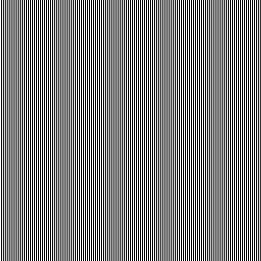


K = 0.99 ; Nearest Neighbour


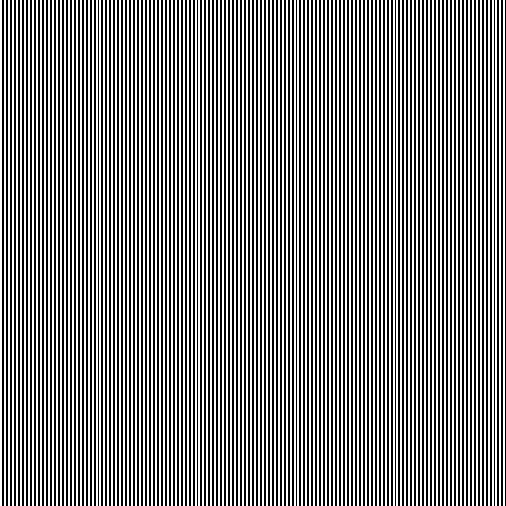


K = 0.99 ; Bilinear


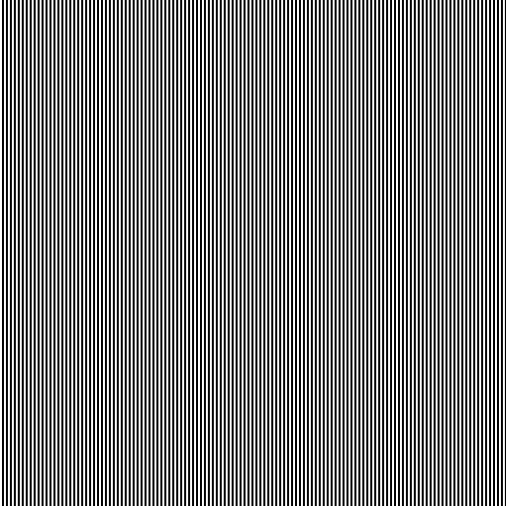


K = 2 ; Nearest Neighbour


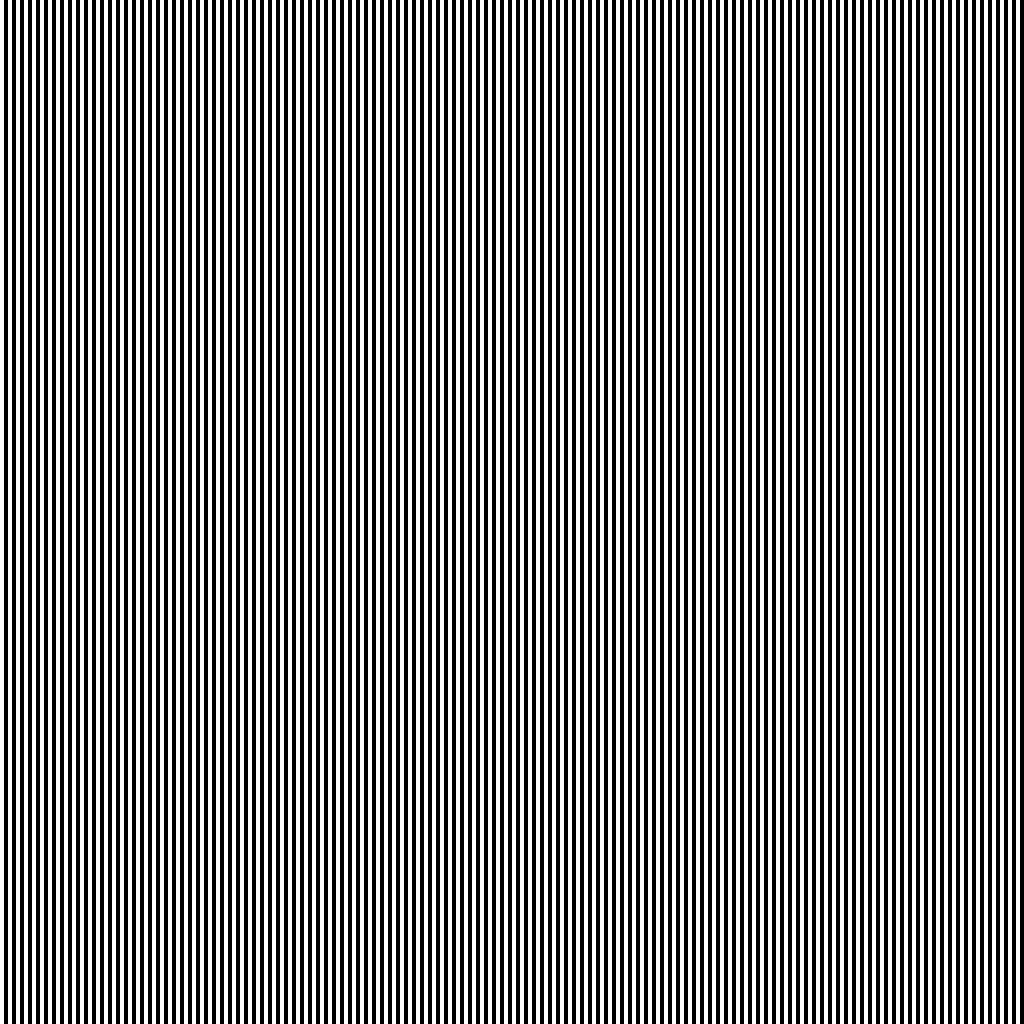


K = 2 ; Bilinear


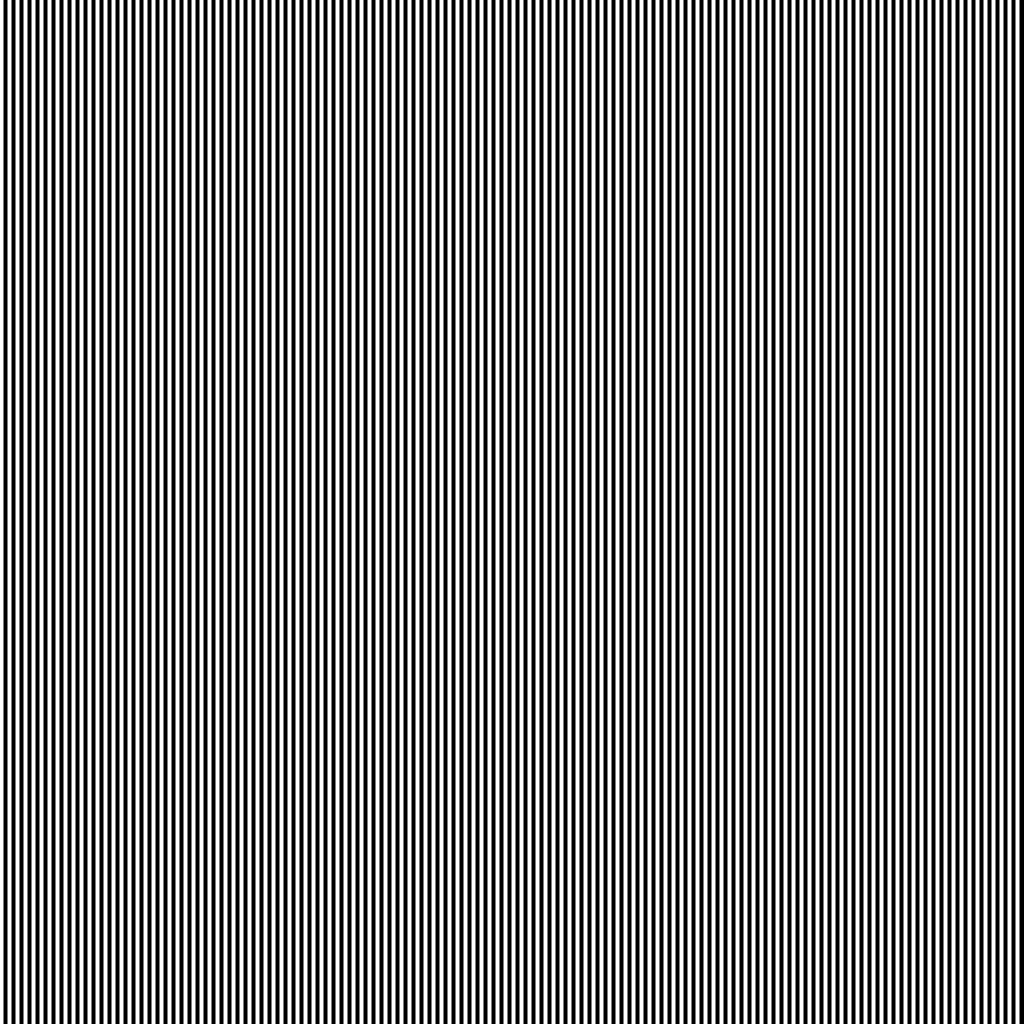


K = 2.1 ; Nearest Neighbour


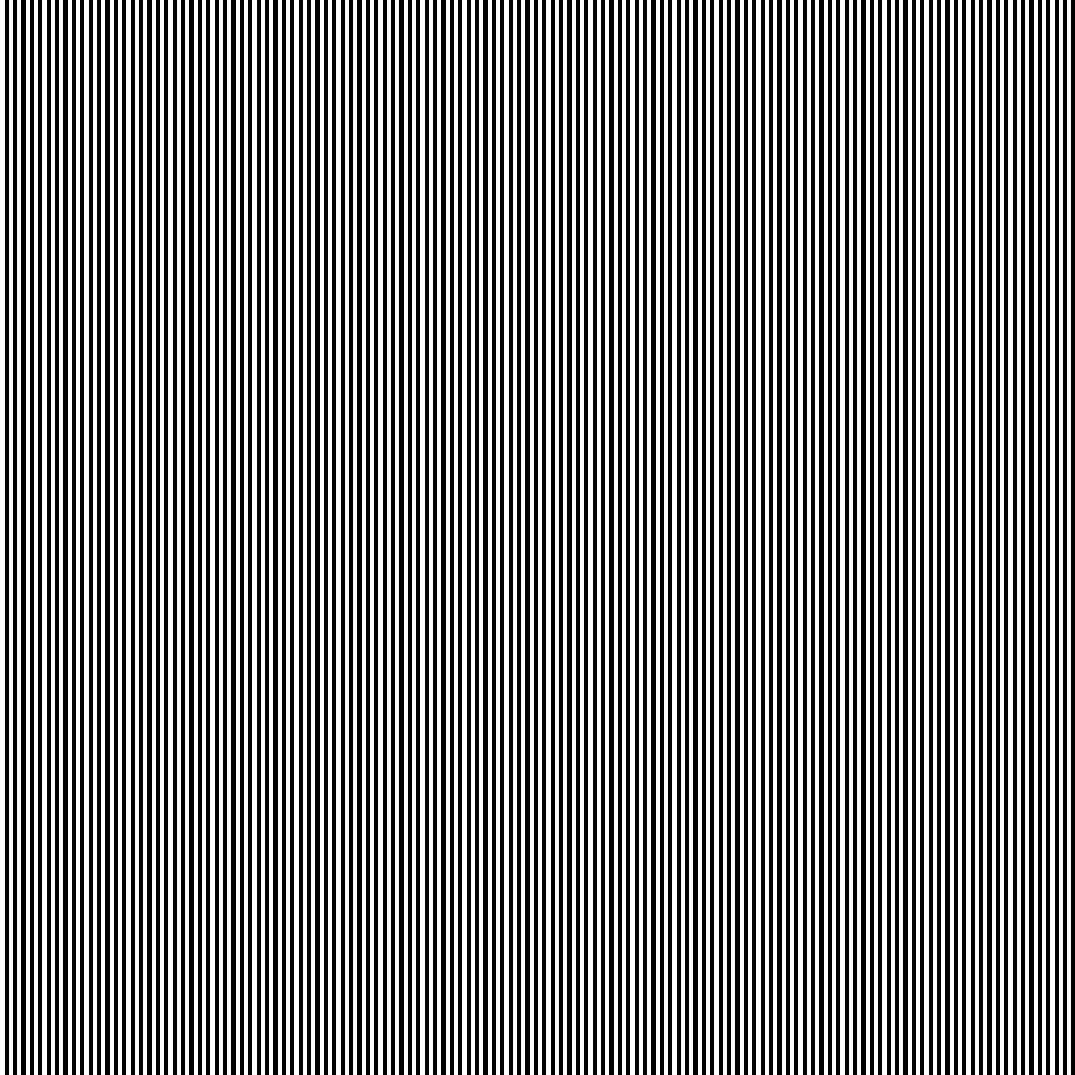


K = 2.1 ; Bilinear


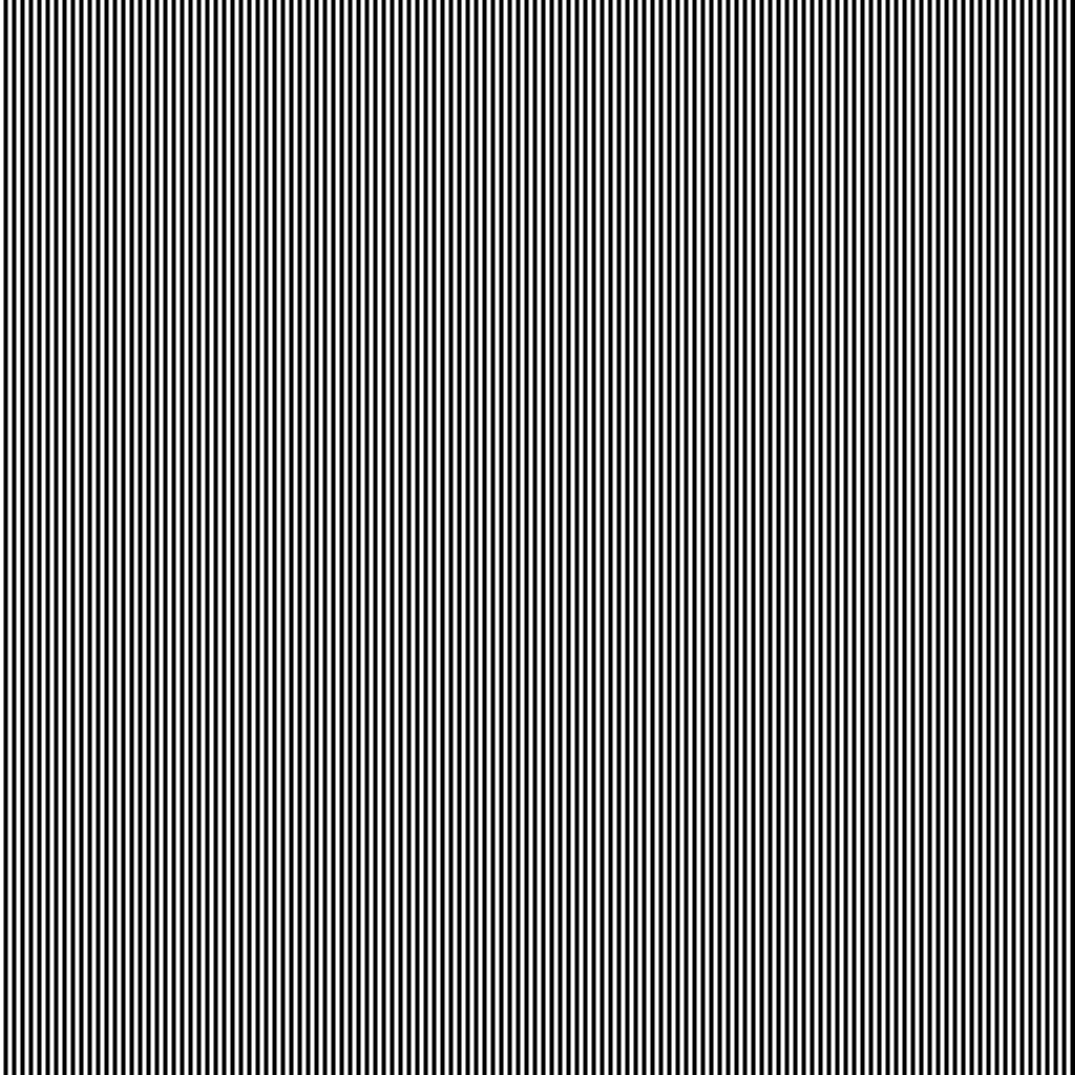

In [ ]:
orig_img = np.copy(data) # Resample this image

#############################
# Start your code from here #
#############################

K=[0.5, 0.51, 0.99, 2, 2.1]
for k in K:
  print('K =',k,'; Nearest Neighbour')
  cv2_imshow(resize_nn(orig_img,k))
  print()
  print('K =',k,'; Bilinear')
  cv2_imshow(resize_bilinear(orig_img,k)) 
  print()
#############################
# End your code here ########
#############################  

In [ ]:
your_observation = """
Nearest Neighbour gives sharp and crisp output, and mainly preserves the values of original image.
Thus it can come handy when we want our data values to remain as it is, such as in the case of categorical data.
Whereas Bilinear interpolation takes weighted average of four surrounding cells in order to obtain the required value.
Thus it has more smoothness in output (as you can see for the case of K=0.51). It is not applicable for categorical data, 
but will be more preferable to Nearest Neighbour in the case of continuous data values.
"""

print(your_observation)


Nearest Neighbour gives sharp and crisp output, and mainly preserves the values of original image.
Thus it can come handy when we want our data values to remain as it is, such as in the case of categorical data.
Whereas Bilinear interpolation takes weighted average of four surrounding cells in order to obtain the required value.
Thus it has more smoothness in output (as you can see for the case of K=0.51). It is not applicable for categorical data, 
but will be more preferable to Nearest Neighbour in the case of continuous data values.

